# Standard  Karmack-McKendrick SIR model

This model consists of three coupled non-linear differential equations which estimates the rates of susceptability, infection and recovery within the population:

1. $\frac{dS}{dt} = - \beta SI / N$
2. $\frac{dI}{dt} = \beta SI / N - \gamma I $
3. $\frac{dR}{dt} = \gamma I$

Where t is the time, S the number of susceptable people, I infected people, R removed people (can simulate recovery or death), N is the summation of SIR, $\beta$ the infection rate, $\gamma$ the recovery rate.

$R_0 = \beta / \gamma$

## The modules needed to solve the coupled equation

In [103]:
import numpy as np
## ODE solver 
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

### Initial constants (to be changed to variables in later editions of the code)

In [108]:
beta = 3.28 * 0.82 #Infection rate (Predicted mean R0 from Italy and China data)
gamma = 0.82 #Recovery rate (as of Worldometers 30-03)

In [109]:
def f1(U,t):
    S = (-beta * U[0] *U[1]) / (U[0] + U[1] + U[2])
    I = (beta * U[0] *U[1]) / (U[0] + U[1] + U[2]) - gamma * U[1]
    R = gamma * U[1]
    return [S,I,R]

In [122]:
ts = np.linspace(0,10,10000)
# Initial conditions - Assumed everyone is susceptable and some people are already infected 
Tot_init = [30000,1,0]

#ODE solver 
Total = odeint(f1,Tot_init,ts)

S = Total[:,0]
I = Total[:,1]
R = Total[:,2]

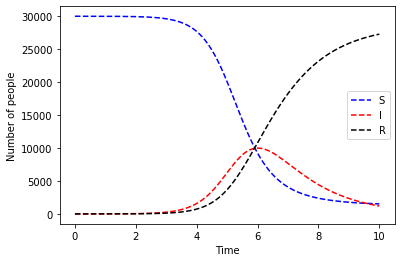

In [123]:
plt.plot(ts,S,'b--', label = "S")
plt.plot(ts,I,'r--', label = "I")
plt.plot(ts,R,'k--', label = "R")
plt.xlabel("Time")
plt.ylabel("Number of people")
plt.legend()
plt.show()